In [29]:
from golay import encode,decode

In [30]:
from BFSK import modulate,demodulate
import numpy as np
from matplotlib import pyplot as plt
from scipy.signal import periodogram
from math import ceil

In [31]:
msgsize=np.random.randint(low=10, high=1000, size=1)[0]
# msgsize=240

In [32]:
Eb = 0.001
fs = 10000
Tb = 0.001
br=1/Tb;                 # bit rate
fc1=br; 
msg = np.random.randint(low=0, high=2, size=msgsize)

In [33]:
msgsize,msgsize%12

(955, 7)

In [34]:
addnzeros=np.zeros((12-msgsize%12,1))
dappendarray=np.zeros((12,1))
dappendarray[msgsize%12]=1

In [35]:
addnzeros,dappendarray

(array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [36]:
msg=np.append(np.append(msg,addnzeros),dappendarray)

In [37]:
msg.shape

(972,)

In [38]:
codedmsg=encode(msg)

In [39]:
codedmsg.shape

(1944,)

In [40]:
modulatedsig=modulate(codedmsg,Eb,Tb,fc1,fs)

0.00039812418889555596


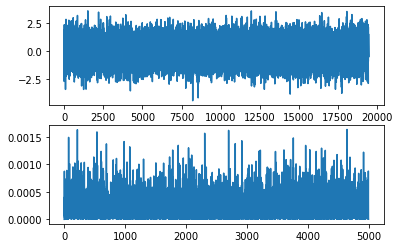

In [41]:
ns = len(modulatedsig)
noise = np.random.normal(size=ns)

f, psd = periodogram(noise, fs)

fig, ax = plt.subplots(2,1)
ax[0].plot(noise)
ax[1].plot(f, psd)

psd_av = np.mean(psd)
N0 = 2*psd_av
signalwnoise= modulatedsig+noise
print(N0)

In [42]:
demodulatedsig=demodulate(signalwnoise,Tb,fc1,fs)

In [43]:
demodulatedsig=np.array(demodulatedsig)

In [44]:
demodulatedsig.shape

(1944,)

In [45]:
decodedmsg=decode(demodulatedsig)

In [46]:
decodedmsg.shape

(972,)

In [47]:
Pb_pr = np.count_nonzero(msg[:239] != decodedmsg[:239]) 

In [48]:
msg.shape,Pb_pr

((972,), 28)

In [49]:
decodedmsg.shape

(972,)

In [50]:
last12bits = decodedmsg[-12:]
bitstoignore = 12 if (np.argmax(last12bits) ==
                          0) else np.argmax(last12bits)
bitstoignore = 12 if (np.argmax(last12bits) ==
                          0) else (12-bitstoignore)
bitstoignore += 12
decodedmsg = decodedmsg[:-(bitstoignore)]

In [51]:
decodedmsg.shape

(955,)

In [52]:
Pb_pr = np.count_nonzero(msg [:240]!= decodedmsg[:240])/len(msg) 

In [53]:
Pb_pr

0.02880658436213992

In [54]:
decodedmsg

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,

In [31]:
# from GolayEncoderDecoder.Encoder.encoder import *
# from GolayEncoderDecoder.Decoder.decoder import *
# import numpy as np

# n = 24
#     # Split data into chunks of 24
# data=demodulatedsig
# split_data = data.reshape(len(data) // n, n)
# decoded_data = []
# for i in range(len(split_data)):
#     # Decode and append
#     temp=decode_extended_Golay(split_data[i].tolist())
#     if temp=="request retransmission":
#         temp=np.random.randint(low=0, high=2, size=12)
#     decoded_data.extend(temp)
# decoded_data = np.array(decoded_data)
   
